In [67]:
import pandas as pd
import h5py
import numpy as np
import scipy as sp
import scipy.signal as sg
import xarray as xr
import os
import matplotlib.pyplot as plt
from matplotlib import patches
import ast

%matplotlib notebook

In [3]:
main_path = r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\2022-08-15_11-22-28_626791\processed"

In [4]:
trials=pd.read_csv(os.path.join(main_path,'trials_table.csv'))

In [5]:
trial_stim_dur=np.zeros(len(trials))
for tt in range(0,len(trials)):
    if trials['trial_sound_dur'].iloc[tt]>0:
        trial_stim_dur[tt]=trials['trial_sound_dur'].iloc[tt]
    elif trials['trial_vis_stim_dur'].iloc[tt]>0:
        trial_stim_dur[tt]=trials['trial_vis_stim_dur'].iloc[tt]

trials['trial_stim_dur']=trial_stim_dur

In [6]:
trials[:10]

,Unnamed: 0,trialStartFrame,trialStimID,trialstimRewarded,trial_response,trial_sound_dur,trial_vis_stim_dur,vis_go_trials,vis_nogo_trials,vis_hit_trials,...,aud_false_alarm_trials,aud_miss_trials,aud_correct_reject_trials,aud_autoreward_trials,catch_trials,catch_resp_trials,trialStimStartFrame,stimStartTime,stimLatency,trial_stim_dur
0,0,0,vis1,vis1,True,0.0,0.5,True,False,False,...,False,False,False,False,False,False,433,87.284220,0.020720,0.5
1,1,674,vis1,vis1,True,0.0,0.5,True,False,False,...,False,False,False,False,False,False,803,93.456000,0.020720,0.5
2,2,1044,vis1,vis1,True,0.0,0.5,True,False,False,...,False,False,False,False,False,False,1197,100.030075,0.022585,0.5
3,3,1438,vis1,vis1,True,0.0,0.5,True,False,False,...,False,False,False,False,False,False,1600,106.752255,0.022585,0.5
4,4,1841,vis1,vis1,True,0.0,0.5,True,False,False,...,False,False,False,False,False,False,1993,113.307625,0.022345,0.5
5,5,2234,sound2,vis1,True,0.5,0.0,False,False,False,...,True,False,False,False,False,False,2345,119.232821,0.076021,0.5
6,6,2586,sound1,vis1,True,0.5,0.0,False,False,False,...,False,False,False,False,False,False,2793,126.733366,0.103646,0.5
7,7,3034,vis2,vis1,True,0.0,0.5,False,True,False,...,False,False,False,False,False,False,3298,135.075945,0.022555,0.5
8,8,3539,sound1,vis1,True,0.5,0.0,False,False,False,...,False,False,False,False,False,False,3688,141.653186,0.094396,0.5
9,9,3929,vis2,vis1,True,0.0,0.5,False,True,False,...,False,False,False,False,False,False,4058,147.753240,0.022630,0.5


In [7]:
lick_times=np.load(os.path.join(main_path,'lick_times.npy'),allow_pickle=True)
lick_times=lick_times[0]
lick_times

array([  27.98856,   28.85258,   36.4437 , ..., 3711.79002, 3711.87005,
       3711.94207])

In [8]:
units=pd.read_csv(os.path.join(main_path,'unit_table.csv'))

In [9]:
## fix this in processing code??
units=units.set_index('id')
# wf_dur=np.zeros((len(units)))
# for uu, uid in enumerate(units.index.values):
#     wf_dur[uu]=ast.literal_eval(units.loc[uid]['waveform_duration'])[0]
    
# units['waveform_duration']=wf_dur

In [10]:
units

,quality,peak_channel,waveform_duration,probe,amplitude,index,cluster_id,firing_rate,presence_ratio,isi_viol,amplitude_cutoff,isolation_distance,l_ratio,d_prime,nn_hit_rate,nn_miss_rate,silhouette_score,max_drift,cumulative_drift,epoch_name
id,,,,,,,,,,,,,,,,,,,,
10000,mua,0,0.433332,A,2.972152,0,0,7.294557,0.99,0.075665,0.066695,13.735280,0.763557,2.726638,0.542000,0.039778,0.007982,13.72,119.79,complete_session
10001,mua,0,0.433332,A,2.472666,1,1,9.935784,0.99,0.170615,0.199826,34.335362,0.245009,2.538814,0.688000,0.043381,0.007982,25.19,172.57,complete_session
10002,good,0,0.466666,A,3.539902,2,2,4.481252,0.99,0.053188,0.028146,9.644711,2.208028,2.251783,0.496994,0.018209,0.043606,18.90,115.98,complete_session
10003,mua,1,0.466666,A,2.582928,3,3,5.673959,0.99,0.311404,0.381861,13.877816,1.774743,2.103251,0.628481,0.009324,0.037633,10.18,128.86,complete_session
10004,good,1,0.433332,A,2.945783,4,4,19.871350,0.99,0.049522,0.022552,37.552305,0.128942,3.578176,0.886667,0.027443,0.037633,22.33,131.95,complete_session
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60576,mua,298,0.733332,F,3.226317,566,576,0.056994,0.23,0.000000,0.077802,28.441033,0.907986,5.273655,0.166667,0.000133,NaN,20.46,16.56,complete_session
60577,good,42,0.566665,F,3.197070,567,577,0.117934,0.93,0.000000,0.015442,27.773183,0.489880,6.384430,0.930556,0.000067,0.030130,12.64,4.69,complete_session
60578,mua,218,0.666665,F,4.035912,568,578,0.068393,0.59,0.000000,0.117354,23.307601,0.875982,5.967396,0.562500,0.000801,NaN,1.32,3.47,complete_session


In [11]:
good_units=units.query('quality == "good" and \
                        isi_viol < 0.5 and \
                        amplitude_cutoff < 0.1 and \
                        presence_ratio > 0.95')

#sort units within probe by channel #
good_units=good_units.sort_values(by=['probe','peak_channel'])
good_units

,quality,peak_channel,waveform_duration,probe,amplitude,index,cluster_id,firing_rate,presence_ratio,isi_viol,amplitude_cutoff,isolation_distance,l_ratio,d_prime,nn_hit_rate,nn_miss_rate,silhouette_score,max_drift,cumulative_drift,epoch_name
id,,,,,,,,,,,,,,,,,,,,
10002,good,0,0.466666,A,3.539902,2,2,4.481252,0.99,0.053188,0.028146,9.644711,2.208028,2.251783,0.496994,0.018209,0.043606,18.90,115.98,complete_session
10004,good,1,0.433332,A,2.945783,4,4,19.871350,0.99,0.049522,0.022552,37.552305,0.128942,3.578176,0.886667,0.027443,0.037633,22.33,131.95,complete_session
10006,good,2,0.433332,A,3.067597,6,6,12.692753,0.99,0.025500,0.037872,28.045546,0.376475,3.028024,0.697333,0.040338,0.007086,23.83,91.79,complete_session
10011,good,4,0.366666,A,2.647854,11,11,20.778210,0.99,0.047770,0.032151,34.601166,0.196492,2.507819,0.861333,0.020730,0.046862,32.48,105.77,complete_session
10012,good,5,0.366666,A,2.775512,12,12,18.970627,0.99,0.050457,0.032922,35.733932,0.134704,3.578971,0.893333,0.011528,0.018480,31.31,94.87,complete_session
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60439,good,301,0.299999,F,2.708867,430,439,11.047175,0.99,0.035681,0.012408,32.232810,0.286242,2.405390,0.849333,0.006950,0.097044,50.02,137.13,complete_session
60442,good,304,0.200000,F,3.317955,433,442,2.272084,0.99,0.334226,0.010561,49.006266,0.005357,2.917428,0.997187,0.000102,0.048715,20.99,237.16,complete_session
60443,good,304,0.866665,F,5.240426,434,443,36.168340,0.99,0.002827,0.001311,141.786831,0.001938,6.269814,0.999333,0.000306,0.026560,48.08,374.66,complete_session


In [12]:
spike_times=np.load(os.path.join(main_path,'spike_times_aligned.npy'),allow_pickle=True).item()

In [13]:
spike_times[good_units.index.values[0]]

array([  10.63550039,   10.77366673,   12.28012991, ..., 4567.85982152,
       4568.00435452, 4568.4276202 ])

In [14]:
frames=pd.read_csv(os.path.join(main_path,'frames_table.csv'))
frames

,Unnamed: 0,vsyncTimes,frameDelay
0,0,80.04110,0.020720
1,1,80.05762,0.020720
2,2,80.07423,0.022585
3,3,80.09092,0.022585
4,4,80.10810,0.022345
...,...,...,...
216905,216905,3698.19226,0.022550
216906,216906,3698.20886,0.022625
216907,216907,3698.22558,0.022625
216908,216908,3698.24227,0.022405


In [15]:
def makePSTH(spikes, startTimes, windowDur, binSize=0.001):
    '''
    Convenience function to compute a peri-stimulus-time histogram
    (see section 7.2.2 here: https://neuronaldynamics.epfl.ch/online/Ch7.S2.html)
    INPUTS:
        spikes: spike times in seconds for one unit
        startTimes: trial start times in seconds; the first spike count 
            bin will be aligned to these times
        windowDur: trial duration in seconds
        binSize: size of spike count bins in seconds
    OUTPUTS:
        Tuple of (PSTH, bins), where:
            PSTH gives the trial-averaged spike rate for 
                each time bin aligned to the start times;
            bins are the bin edges as defined by numpy histogram
    '''
    bins = np.arange(0,windowDur+binSize,binSize)
    counts = np.zeros(bins.size-1)
    for i,start in enumerate(startTimes):
        startInd = np.searchsorted(spikes, start)
        endInd = np.searchsorted(spikes, start+windowDur)
        counts = counts + np.histogram(spikes[startInd:endInd]-start, bins)[0]
    
    counts = counts/len(startTimes)
    return counts/binSize, bins


def make_neuron_time_trials_tensor(units, spike_times, stim_table, 
                                   time_before, trial_duration,
                                   bin_size=0.001):
    '''
    Function to make a tensor with dimensions [neurons, time bins, trials] to store
    the spike counts for stimulus presentation trials. 
    INPUTS:
        units: dataframe with unit info (same form as session.units table)
        stim_table: dataframe whose indices are trial ids and containing a
            'start_time' column indicating when each trial began
        time_before: seconds to take before each start_time in the stim_table
        trial_duration: total time in seconds to take for each trial
        bin_size: bin_size in seconds used to bin spike counts 
    OUTPUTS:
        unit_tensor: tensor storing spike counts. The value in [i,j,k] 
            is the spike count for neuron i at time bin j in the kth trial.
    '''
    neuron_number = len(units)
    trial_number = len(stim_table)
    unit_tensor = np.zeros((neuron_number, int(trial_duration/bin_size), trial_number))
    
    for u_counter, (iu, unit) in enumerate(units.iterrows()):
        unit_spike_times = spike_times[iu]
        for t_counter, (it, trial) in enumerate(stim_table.iterrows()):
            if 'stimStartTime' in trial:
                trial_start = trial.stimStartTime - time_before
            elif 'start_time' in trial:
                trial_start = trial.start_time - time_before
            unit_tensor[u_counter, :, t_counter] = makePSTH(unit_spike_times, 
                                                            [trial_start], 
                                                            trial_duration, 
                                                            binSize=bin_size)[0]
    return unit_tensor

In [71]:
#Make tensor
time_before_flash = 1
trial_duration = 3
bin_size = 0.001
trial_tensor = make_neuron_time_trials_tensor(good_units, spike_times, trials, 
                                              time_before_flash, trial_duration, 
                                              bin_size)

In [72]:
# make xarray
trial_da = xr.DataArray(trial_tensor, dims=("unit_id", "time", "trials"), 
                       coords={
                           "unit_id": good_units.index.values,
                           "time": np.arange(0, trial_duration, bin_size)-time_before_flash,
                           "trials": trials.index.values
                           })

<IPython.core.display.Javascript object>


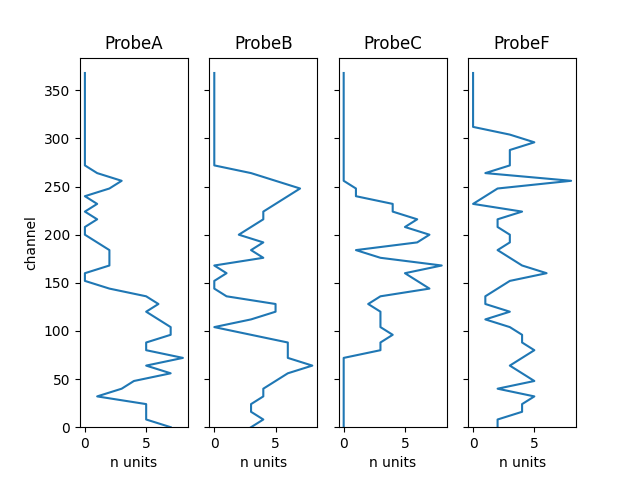

In [38]:
# ID areas
probes = good_units['probe'].unique()
ch_bins=np.arange(0,384,8)

units_by_channel = good_units[['probe','peak_channel']].value_counts()

fig,ax=plt.subplots(1,len(probes))

for ip,pr in enumerate(probes):
    unit_hist,edges=np.histogram(units_by_channel[pr].sort_index().index,bins=ch_bins)
    ax[ip].plot(unit_hist,ch_bins[:-1])
#     ax[ip].plot(units_by_channel[pr].sort_index().values,units_by_channel[pr].sort_index().index)
    ax[ip].set_ylim([0,384])
    ax[ip].set_xlabel('n units')
    ax[ip].set_title('Probe'+pr)
    if ip>0:
        ax[ip].set_yticklabels([])
    else:
        ax[ip].set_ylabel('channel')
        

In [19]:
## make probe-by-probe dicts

n_chans_to_average = 8
chan_vect = np.arange(0,384,n_chans_to_average)
baseline_time = [-0.07,-0.02]
stim_time = [0.02, 0.07]

trial_type_dict = ['vis_go_trials','vis_nogo_trials','aud_go_trials','aud_nogo_trials','catch_trials']
probe_dict = ['A','B','C','F']

#save [probe][trial_type] dicts of channel vectors?

line_styles = ['b-','b--','r-','r--','grey']
line_style = {}

channel_data={}
for pr in probe_dict:
    channel_data[pr]={}
    for it,tt in enumerate(trial_type_dict):
        channel_data[pr][tt]=np.zeros(len(chan_vect))
        line_style[tt]=line_styles[it]

for ip,probe in enumerate(probe_dict):
    for tt,trial_type in enumerate(trial_type_dict):
        for cc,ch in enumerate(chan_vect):
            #find units in channel range
            sel_units = good_units.query("peak_channel >= @ch and \
                                          peak_channel < @ch+@n_chans_to_average and \
                                          probe == @probe")
            unit_ch_idx = sel_units.index.values
            
            #find avg baseline fr of these units during these trials
            baseline_data = trial_da.sel(trials=trials[trials[trial_type]==True].index.values,
                                         unit_id=unit_ch_idx,
                                         time=slice(baseline_time[0],baseline_time[1]))
            
            #find avg stim fr of these units during these trials
            stimulus_data = trial_da.sel(trials=trials[trials[trial_type]==True].index.values,
                                         unit_id=unit_ch_idx,
                                         time=slice(stim_time[0],stim_time[1]))
            
            channel_data[probe][trial_type][cc]=np.abs(stimulus_data.mean()-baseline_data.mean())
            
    


C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_3

C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_3

C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_3

C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_3

C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_3

C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_3

C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Anaconda3\envs\allensdk_3

<IPython.core.display.Javascript object>


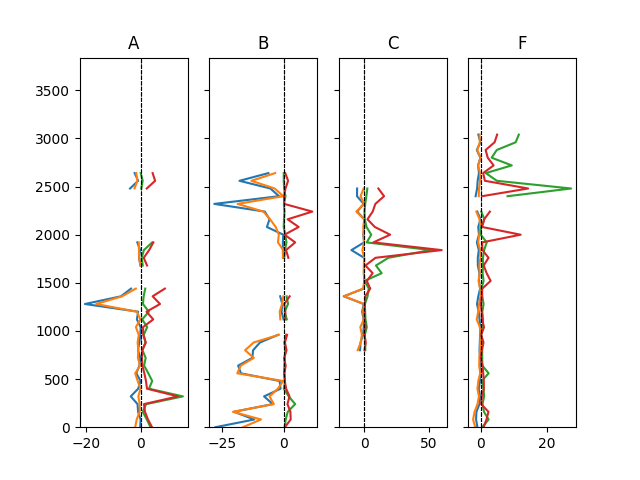

In [20]:
# plot the channel-wise data

fig, ax = plt.subplots(1,len(probe_dict),sharey=True)

for ip,probe in enumerate(probe_dict):
    for tt,trial_type in enumerate(trial_type_dict):
        ax[ip].axvline(0,linestyle='--',color='k',linewidth=0.75)
        if 'vis' in trial_type:
            ax[ip].plot(-channel_data[probe][trial_type],chan_vect*10)
        elif 'aud' in trial_type:
            ax[ip].plot(channel_data[probe][trial_type],chan_vect*10)
            
#     if ip>0:
#         ax[ip].set_yticklabels([])
    
    ax[ip].set_title(probe)
        
    ax[ip].set_ylim([0,3840])
#     ax[ip].set_xlim([-40,40])

In [21]:
#area guesses - 8/15 recording
area_ch_guess={}

area_ch_guess['A']={}
area_ch_guess['A']['RSP']=[200,280]
area_ch_guess['A']['Hipp']=[150,200]
area_ch_guess['A']['VIS_Thal']=[120,150]
area_ch_guess['A']['Thal']=[0,120]

area_ch_guess['B']={}
area_ch_guess['B']['VIS']=[200,280]
area_ch_guess['B']['Hipp']=[100,200]
area_ch_guess['B']['VIS_Thal']=[0,100]

area_ch_guess['C']={}
area_ch_guess['C']['VISl']=[215,260]
area_ch_guess['C']['AUD']=[150,215]
area_ch_guess['C']['Hipp']=[50,150]

area_ch_guess['F']={}
area_ch_guess['F']['MOs']=[235,325]
area_ch_guess['F']['STR']=[0,235]

for pr in area_ch_guess.keys():
    temp_ch_area_map = np.empty([384,1],dtype='S8',)
    temp_ch_area_map[:] = 'null'
    for aa in area_ch_guess[pr]:
        temp_ch_area_map[area_ch_guess[pr][aa][0]:area_ch_guess[pr][aa][1]]=aa
        
    area_ch_guess[pr]['ch_area_array']=np.hstack(temp_ch_area_map).astype('str')
        

In [22]:
#Assign unit guesses to areas
area_id=[]
for (iu, unit) in good_units.iterrows():
    temp_area_id=area_ch_guess[unit['probe']]['ch_area_array'][unit['peak_channel']]
    area_id.append(temp_area_id)
area_id=np.hstack(area_id)

good_units['area_id']=area_id

In [23]:
good_units

,quality,peak_channel,waveform_duration,probe,amplitude,index,cluster_id,firing_rate,presence_ratio,isi_viol,...,isolation_distance,l_ratio,d_prime,nn_hit_rate,nn_miss_rate,silhouette_score,max_drift,cumulative_drift,epoch_name,area_id
id,,,,,,,,,,,,,,,,,,,,,
10002,good,0,0.466666,A,3.539902,2,2,4.481252,0.99,0.053188,...,9.644711,2.208028,2.251783,0.496994,0.018209,0.043606,18.90,115.98,complete_session,Thal
10004,good,1,0.433332,A,2.945783,4,4,19.871350,0.99,0.049522,...,37.552305,0.128942,3.578176,0.886667,0.027443,0.037633,22.33,131.95,complete_session,Thal
10006,good,2,0.433332,A,3.067597,6,6,12.692753,0.99,0.025500,...,28.045546,0.376475,3.028024,0.697333,0.040338,0.007086,23.83,91.79,complete_session,Thal
10011,good,4,0.366666,A,2.647854,11,11,20.778210,0.99,0.047770,...,34.601166,0.196492,2.507819,0.861333,0.020730,0.046862,32.48,105.77,complete_session,Thal
10012,good,5,0.366666,A,2.775512,12,12,18.970627,0.99,0.050457,...,35.733932,0.134704,3.578971,0.893333,0.011528,0.018480,31.31,94.87,complete_session,Thal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60439,good,301,0.299999,F,2.708867,430,439,11.047175,0.99,0.035681,...,32.232810,0.286242,2.405390,0.849333,0.006950,0.097044,50.02,137.13,complete_session,MOs
60442,good,304,0.200000,F,3.317955,433,442,2.272084,0.99,0.334226,...,49.006266,0.005357,2.917428,0.997187,0.000102,0.048715,20.99,237.16,complete_session,MOs
60443,good,304,0.866665,F,5.240426,434,443,36.168340,0.99,0.002827,...,141.786831,0.001938,6.269814,0.999333,0.000306,0.026560,48.08,374.66,complete_session,MOs


In [24]:
#define colors for areas

color_guide={}
color_guide['VISl']='tab:cyan'
color_guide['VIS']='tab:green'
color_guide['AUD']='tab:red'
color_guide['MOs']='tab:orange'
color_guide['RSP']='tab:olive'
color_guide['VIS_Thal']='tab:blue'
color_guide['Thal']='tab:brown'
color_guide['Hipp']='y'
color_guide['STR']='dimgrey'

In [27]:
trials

,Unnamed: 0,trialStartFrame,trialStimID,trialstimRewarded,trial_response,trial_sound_dur,trial_vis_stim_dur,vis_go_trials,vis_nogo_trials,vis_hit_trials,...,aud_false_alarm_trials,aud_miss_trials,aud_correct_reject_trials,aud_autoreward_trials,catch_trials,catch_resp_trials,trialStimStartFrame,stimStartTime,stimLatency,trial_stim_dur
0,0,0,vis1,vis1,True,0.0,0.5,True,False,False,...,False,False,False,False,False,False,433,87.284220,0.020720,0.5
1,1,674,vis1,vis1,True,0.0,0.5,True,False,False,...,False,False,False,False,False,False,803,93.456000,0.020720,0.5
2,2,1044,vis1,vis1,True,0.0,0.5,True,False,False,...,False,False,False,False,False,False,1197,100.030075,0.022585,0.5
3,3,1438,vis1,vis1,True,0.0,0.5,True,False,False,...,False,False,False,False,False,False,1600,106.752255,0.022585,0.5
4,4,1841,vis1,vis1,True,0.0,0.5,True,False,False,...,False,False,False,False,False,False,1993,113.307625,0.022345,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,474,213238,sound2,sound1,True,0.5,0.0,False,False,False,...,True,False,False,False,False,False,213351,3639.015000,0.105250,0.5
475,475,213592,vis2,sound1,False,0.0,0.5,False,True,False,...,False,False,False,False,False,False,214200,3653.094225,0.022725,0.5
476,476,214441,sound1,sound1,True,0.5,0.0,False,False,False,...,False,False,False,False,False,False,214582,3659.535086,0.091646,0.5
477,477,214823,vis1,sound1,False,0.0,0.5,True,False,False,...,False,False,False,False,False,False,215388,3672.910360,0.022480,0.5


In [74]:
# plot VIS units

VIS_units = good_units.query('area_id == "MOs"')

# 1 - response on vis block hits
hit_trials = trials.query('trialStimID == "vis1" and \
                           trialstimRewarded == "vis1" and \
                           trial_response == True').index

hit_resp = trial_da.sel(unit_id=VIS_units.index, trials=hit_trials).mean(dim=['unit_id','trials'])

# 2 - response on aud block correct rejects
cr_trials = trials.query('trialStimID == "vis1" and \
                           trialstimRewarded == "sound1" and \
                           trial_response == False').index

cr_resp = trial_da.sel(unit_id=VIS_units.index, trials=cr_trials).mean(dim=['unit_id','trials'])

# 3 - response on aud block false alarms
fa_trials = trials.query('trialStimID == "vis1" and \
                           trialstimRewarded == "sound1" and \
                           trial_response == True').index

fa_resp = trial_da.sel(unit_id=VIS_units.index, trials=fa_trials).mean(dim=['unit_id','trials'])


# # 4 - response on vis block misses
# miss_trials = trials.query('trialStimID == "vis1" and \
#                            trialstimRewarded == "vis1" and \
#                            trial_response == False').index

# miss_resp = trial_da.sel(unit_id=VIS_units.index, trials=miss_trials).mean(dim=['unit_id','trials'])


<IPython.core.display.Javascript object>


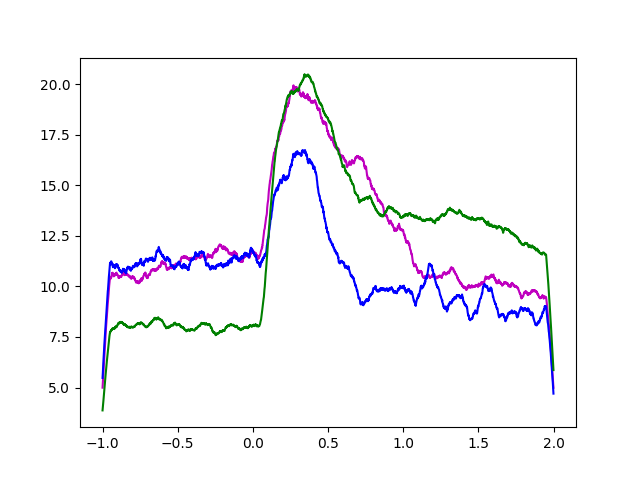

In [81]:
gwindow = sg.gaussian(100, std=50)

# sg.convolve(fa_resp,gwindow,mode='same')/np.sum(gwindow)

fig,ax=plt.subplots(1,1)

ax.plot(fa_resp.time,sg.convolve(fa_resp,gwindow,mode='same')/np.sum(gwindow),'m')
# ax.plot(miss_resp.time,miss_resp,'k')
ax.plot(cr_resp.time,sg.convolve(cr_resp,gwindow,mode='same')/np.sum(gwindow),'b')
ax.plot(hit_resp.time,sg.convolve(hit_resp,gwindow,mode='same')/np.sum(gwindow),'g')

